In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v2_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().DSAMuon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().DSAMuon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo1DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dxy', 'dxyErr', 'dxybs', 'dz', 'dzErr', 'eta', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'pfRelIso03_all', 'pfRelIso03_chg', 'pfRelIso04_all', 'phi', 'pt', 'ptErr', 'segmentComp', 'sip3d', 'softMva', 'tkRelIso', 'tunepRelPt', 'mvaLowPt', 'mvaTTH', 'charge', 'jetIdx', 'nStations', 'nTrackerLayers', 'pdgId', 'tightCharge', 'fsrPhotonIdx', 'highPtId', 'highPurity', 'inTimeMuon', 'isGlobal', 'isPFcand', 'isStandalone', 'isTracker', 'jetNDauCharged', 'looseId', 'mediumId', 'mediumPromptId', 'miniIsoId', 'multiIsoId', 'mvaId', 'mvaLowPtId', 'pfIsoId', 'puppiIsoId', 'softId', 'softMvaId', 'tightId', 'tkIsoId', 'triggerIdLoose', 'idx', 'trkPt', 'trkPtErr', 'dzPV', 'dzPVErr', 'dxyPVTraj', 'dxyPVTrajErr', 'dxyPVSigned', 'dxyPVSignedErr', 'ip3DPVSigned', 'ip3DPVSignedErr', 'dxyBS', 'dxyBSErr', 'dzBS', 'dzBSErr', 'dxyBSTraj', 'dxyBSTrajErr', 'dxyBSSigned', 'dxyBSSignedErr', 'ip3DBSSigned', 'ip3DBSSignedErr', 'trkNumPlanes', 'trkNumHits', 'trkNumDTHits', '

# Information for Muon Matching
## Same disentangling what we have vs what is needed to complete them is needed

## muonMatch1

4mu muonMatch1 structure: [[2, 3, 2], [6, 5, 0, 7, 0, 1], [3, 0, 0, ... 4, 3], [4, 3, 4, 3, 0], [0, 4, 4, 3]]
2mu2e muonMatch1 structure: [[4, 3, 0, 0, 0], [4, 4], [3, 3, 0, 3], [0, ... [4, 3], [3, 3], [3, 2], [4, 4, 0]]
4mu muonMatch1 structure: [[0, 2, 3, 3, 3], [0, 4, 4, 2, 3], [0, 4, ... [4, 4, 2, 0, 0, 0, 0, 0], [1, 2, 2]]
2mu2e muonMatch1 structure: [[2], [1, 0, 0, 2], [4, 0, 0, 0, 4], [4, ... [0, 3, 3], [0, 0, 3, 2, 2, 0], [3, 3]]
4mu muonMatch1 structure: [[4, 4, 4, 0, 4, 4, 0, 3, 1], [4, 0, 4, 4, ... [4, 3, 0, 0, 3], [0, 4, 3, 3, 4, 4]]
2mu2e muonMatch1 structure: [[0, 3], [3, 3], [2, 4], [2], [2, 0, 4, ... 3], [4, 3, 0], [2, 4], [0, 0, 4, 3, 0]]
4mu muonMatch1 structure: [[2, 4, 2, 0], [1, 2, 3], [1, 4, 2], [0, ... [4], [0, 0, 4, 4, 0, 2, 2], [3, 3, 2]]
2mu2e muonMatch1 structure: [[0, 3, 0, 0, 3], [4, 0, 4], [0, 0, 4], ... [0, 0, 1, 0, 0, 0], [4, 3], [2, 0]]
4mu muonMatch1 structure: [[2, 1, 0], [-1, -1, -1, -1, -1], [0, 0, 0, ... 2, 0], [0, 0, 2, 2, 2], [0, 0, 1, 7]]
2mu2e 

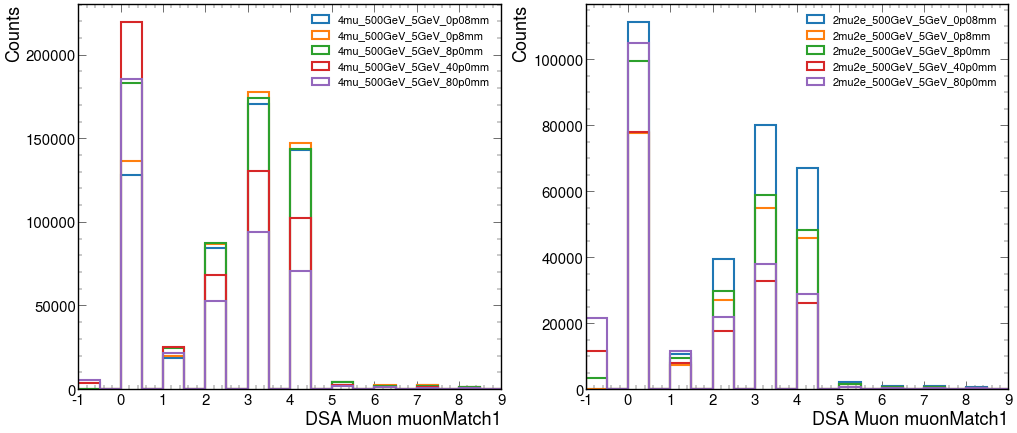

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonMatch1", events_4mu[i_4mu].muonMatch1, events_2mu2e[i_2mu].muonMatch1)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonMatch1), range=(-1,9), alpha=1, bins=20, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonMatch1),range=(-1,9), alpha=1, bins=20, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,9)
ax[1].set_xlim(-1,9)
ax[0].set_xlabel('DSA Muon muonMatch1')
ax[1].set_xlabel('DSA Muon muonMatch1')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper right')
ax[1].legend(fontsize=16, loc='upper right')
ax[0].set_xticks([-1,0,1,2,3,4,5,6,7,8,9])
ax[1].set_xticks([-1,0,1,2,3,4,5,6,7,8,9])
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonMatch1.png", bbox_inches="tight")

## muonMatch1idx

4mu muonMatch1idx structure: [[0, 1, 3], [1, 4, 4, 0, 4, 3], [2, 3, 3, ... 1, 3], [2, 3, 0, 1, 3], [3, 0, 3, 1]]
2mu2e muonMatch1idx structure: [[1, 0, 1, 1, 1], [0, 1], [2, 0, 2, 1], [1, ... [0, 1], [0, 1], [0, 1], [1, 0, 1]]
4mu muonMatch1idx structure: [[3, 3, 0, 1, 2], [3, 3, 0, 1, 2], [3, 0, ... [2, 0, 3, 4, 4, 4, 4, 4], [0, 3, 2]]
2mu2e muonMatch1idx structure: [[1], [0, 1, 1, 1], [1, 1, 1, 1, 0], [0, ... [1, 1, 0], [2, 2, 2, 1, 0, 2], [1, 0]]
4mu muonMatch1idx structure: [[0, 0, 2, 4, 4, 2, 4, 1, 3], [1, 2, 0, 2, ... [2, 0, 3, 3, 3], [4, 4, 1, 1, 3, 2]]
2mu2e muonMatch1idx structure: [[1, 0], [1, 0], [0, 1], [1], [1, 4, 0, ... 1], [0, 1, 1], [1, 1], [1, 1, 1, 0, 1]]
4mu muonMatch1idx structure: [[3, 2, 0, 3], [3, 0, 1], [2, 0, 1], [2, ... [0], [3, 3, 2, 1, 3, 3, 0], [2, 0, 1]]
2mu2e muonMatch1idx structure: [[1, 0, 1, 1, 1], [0, 1, 1], [0, 0, 0], ... [0, 0, 0, 0, 0, 0], [0, 1], [0, 1]]
4mu muonMatch1idx structure: [[1, 0, 2], [-1, -1, -1, -1, -1], [2, 2, 2, ... 3, 3], [2, 2, 0, 

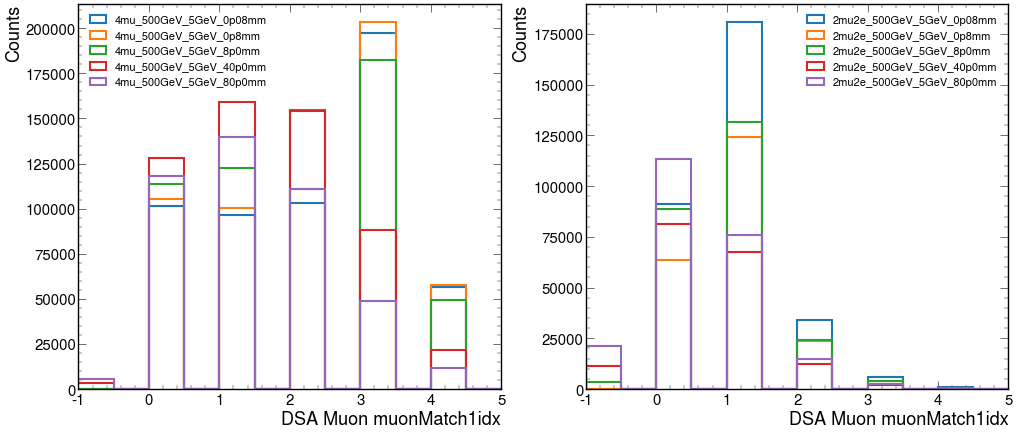

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonMatch1idx", events_4mu[i_4mu].muonMatch1idx, events_2mu2e[i_2mu].muonMatch1idx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonMatch1idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonMatch1idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,5)
ax[1].set_xlim(-1,5)
ax[0].set_xlabel('DSA Muon muonMatch1idx')
ax[1].set_xlabel('DSA Muon muonMatch1idx')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper left')
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonMatch1idx.png", bbox_inches="tight")

## muonMatch2

4mu muonMatch2 structure: [[1, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, ... 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0]]
2mu2e muonMatch2 structure: [[0, 0, 0, 0, 0], [0, 0], [0, 0, 0, 0], [0, ... [0, 0], [0, 0], [0, 0], [0, 0, 0]]
4mu muonMatch2 structure: [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, ... [4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 2]]
2mu2e muonMatch2 structure: [[0], [0, 0, 0, 0], [0, 0, 0, 0, 0], [0, ... [0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0]]
4mu muonMatch2 structure: [[2, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, ... [4, 0, 0, 0, 0], [0, 4, 0, 0, 0, 0]]
2mu2e muonMatch2 structure: [[0, 0], [0, 0], [0, 0], [2], [0, 0, 0, ... 0], [0, 0, 0], [0, 0], [0, 0, 0, 0, 0]]
4mu muonMatch2 structure: [[2, 0, 0, 0], [0, 0, 0], [0, 0, 0], [0, ... [-1], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0]]
2mu2e muonMatch2 structure: [[0, 0, 0, 0, 0], [0, 0, 0], [-1, -1, ... -1, -1, -1, -1, -1, -1], [0, 0], [0, 0]]
4mu muonMatch2 structure: [[0, 0, 0], [-1, -1, -1, -1, -1], [0, 0, 0, ... 2, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0]]
2m

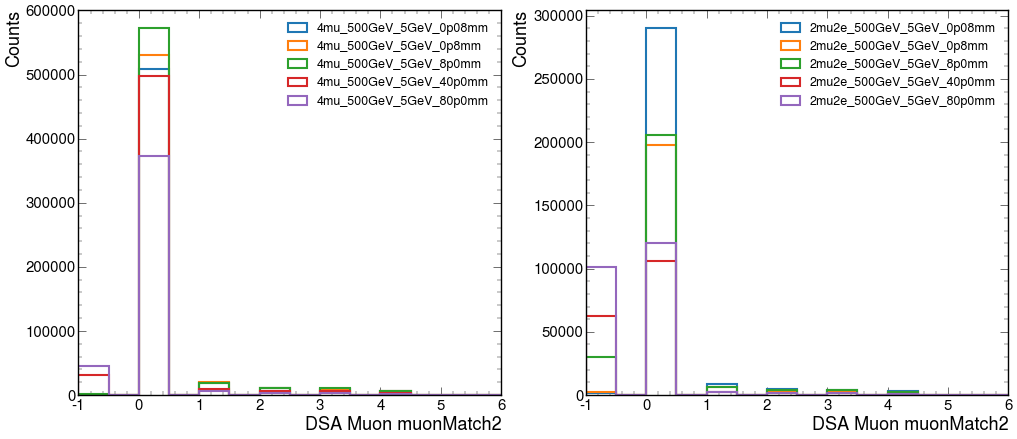

In [16]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonMatch2", events_4mu[i_4mu].muonMatch2, events_2mu2e[i_2mu].muonMatch2)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonMatch2), range=(-1,6), alpha=1, bins=14, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonMatch2), range=(-1,6), alpha=1, bins=14, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,6)
ax[1].set_xlim(-1,6)
ax[0].set_xlabel('DSA Muon muonMatch2')
ax[1].set_xlabel('DSA Muon muonMatch2')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18, loc='upper right')
ax[1].legend(fontsize=18)
ax[0].set_xticks([-1,0,1,2,3,4,5,6])
ax[1].set_xticks([-1,0,1,2,3,4,5,6])
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonMatch2.png", bbox_inches="tight")

## muonMatch2idx

4mu muonMatch2idx structure: [[2, 3, 2], [2, 3, 3, 4, 3, 4], [3, 2, 2, ... 3, 2], [3, 2, 3, 3, 2], [2, 3, 2, 3]]
2mu2e muonMatch2idx structure: [[0, 1, 0, 0, 0], [1, 0], [1, 2, 1, 2], [0, ... [1, 0], [1, 0], [1, 0], [0, 1, 0]]
4mu muonMatch2idx structure: [[2, 2, 3, 3, 3], [2, 2, 3, 3, 3], [2, 3, ... [1, 4, 4, 3, 3, 3, 3, 3], [3, 2, 1]]
2mu2e muonMatch2idx structure: [[0], [1, 0, 0, 0], [0, 0, 0, 0, 1], [1, ... [0, 0, 1], [1, 1, 1, 2, 2, 1], [0, 1]]
4mu muonMatch2idx structure: [[2, 4, 4, 3, 3, 4, 3, 4, 4], [2, 1, 2, 1, ... [1, 3, 2, 2, 2], [3, 0, 4, 4, 4, 4]]
2mu2e muonMatch2idx structure: [[0, 1], [0, 1], [1, 0], [0], [4, 3, 4, ... 0], [1, 0, 0], [0, 0], [0, 0, 0, 1, 0]]
4mu muonMatch2idx structure: [[1, 3, 3, 2], [2, 3, 3], [1, 2, 2], [1, ... [-1], [2, 2, 3, 3, 2, 2, 3], [1, 2, 2]]
2mu2e muonMatch2idx structure: [[0, 1, 0, 0, 0], [1, 0, 0], [-1, -1, ... -1, -1, -1, -1, -1, -1], [1, 0], [1, 0]]
4mu muonMatch2idx structure: [[2, 2, 1], [-1, -1, -1, -1, -1], [1, 1, 1, ... 0, 2], [1, 1,

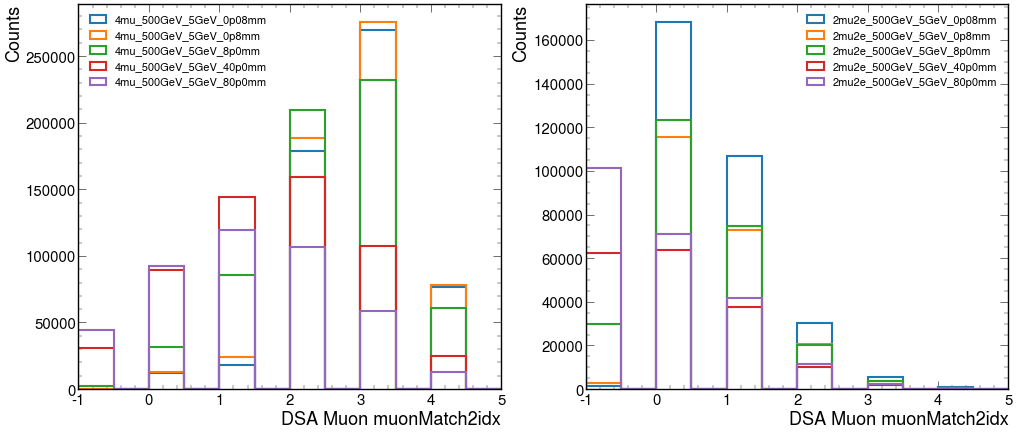

In [17]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonMatch2idx", events_4mu[i_4mu].muonMatch2idx, events_2mu2e[i_2mu].muonMatch2idx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonMatch2idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonMatch2idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,5)
ax[1].set_xlim(-1,5)
ax[0].set_xlabel('DSA Muon muonMatch2idx')
ax[1].set_xlabel('DSA Muon muonMatch2idx')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper left')
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonMatch2idx.png", bbox_inches="tight")

## muonMatch3

4mu muonMatch3 structure: [[0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, ... 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0]]
2mu2e muonMatch3 structure: [[-1, -1, -1, -1, -1], [-1, -1], [0, 0, 0, ... -1], [-1, -1], [-1, -1], [-1, -1, -1]]
4mu muonMatch3 structure: [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, ... [2, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0]]
2mu2e muonMatch3 structure: [[-1], [-1, -1, -1, -1], [-1, -1, -1, -1, -1, ... -1], [0, 0, 0, 0, 0, 0], [-1, -1]]
4mu muonMatch3 structure: [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, ... [0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
2mu2e muonMatch3 structure: [[-1, -1], [-1, -1], [-1, -1], [-1], ... -1, -1, -1], [-1, -1], [-1, -1, -1, -1, -1]]
4mu muonMatch3 structure: [[0, 0, 0, 0], [0, 0, 0], [0, 0, 0], [0, ... [-1], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0]]
2mu2e muonMatch3 structure: [[-1, -1, -1, -1, -1], [-1, -1, -1], [-1, ... -1, -1, -1, -1], [-1, -1], [-1, -1]]
4mu muonMatch3 structure: [[0, 0, 0], [-1, -1, -1, -1, -1], [0, 0, ... 0], [0, 0, 0, 0, 0], [-1, -1, -1, -1]

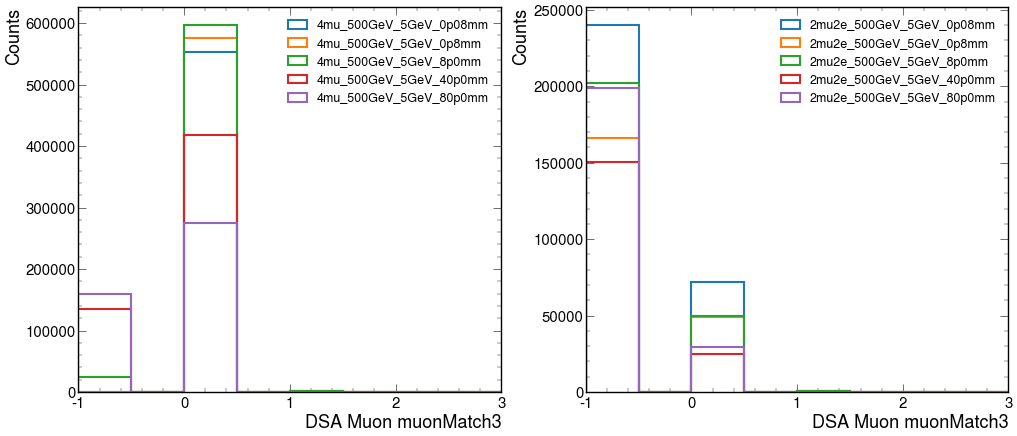

In [19]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonMatch3", events_4mu[i_4mu].muonMatch3, events_2mu2e[i_2mu].muonMatch3)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonMatch3), range=(-1,3), alpha=1, bins=8, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonMatch3), range=(-1,3), alpha=1, bins=8, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,3)
ax[1].set_xlim(-1,3)
ax[0].set_xlabel('DSA Muon muonMatch3')
ax[1].set_xlabel('DSA Muon muonMatch3')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18, loc='upper right')
ax[1].legend(fontsize=18)
ax[0].set_xticks([-1,0,1,2,3])
ax[1].set_xticks([-1,0,1,2,3])
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonMatch3.png", bbox_inches="tight")

## muonMatch3idx

4mu muonMatch3idx structure: [[3, 2, 1], [4, 2, 2, 3, 2, 2], [1, 1, 1, ... 2, 1], [1, 1, 2, 2, 1], [1, 2, 1, 2]]
2mu2e muonMatch3idx structure: [[-1, -1, -1, -1, -1], [-1, -1], [0, 1, 0, ... -1], [-1, -1], [-1, -1], [-1, -1, -1]]
4mu muonMatch3idx structure: [[1, 1, 2, 2, 1], [1, 1, 2, 2, 1], [1, 2, ... [4, 3, 2, 2, 2, 2, 2, 2], [2, 1, 3]]
2mu2e muonMatch3idx structure: [[-1], [-1, -1, -1, -1], [-1, -1, -1, -1, -1, ... -1], [0, 0, 0, 0, 1, 0], [-1, -1]]
4mu muonMatch3idx structure: [[4, 3, 3, 2, 2, 3, 2, 3, 2], [0, 0, 1, 0, ... [3, 2, 1, 1, 1], [2, 3, 3, 3, 2, 3]]
2mu2e muonMatch3idx structure: [[-1, -1], [-1, -1], [-1, -1], [-1], ... -1, -1, -1], [-1, -1], [-1, -1, -1, -1, -1]]
4mu muonMatch3idx structure: [[2, 1, 2, 1], [1, 2, 2], [0, 1, 0], [0, ... [-1], [1, 1, 1, 2, 1, 1, 2], [0, 1, 0]]
2mu2e muonMatch3idx structure: [[-1, -1, -1, -1, -1], [-1, -1, -1], [-1, ... -1, -1, -1, -1], [-1, -1], [-1, -1]]
4mu muonMatch3idx structure: [[0, 1, 0], [-1, -1, -1, -1, -1], [0, 0, ... 1], [0, 0,

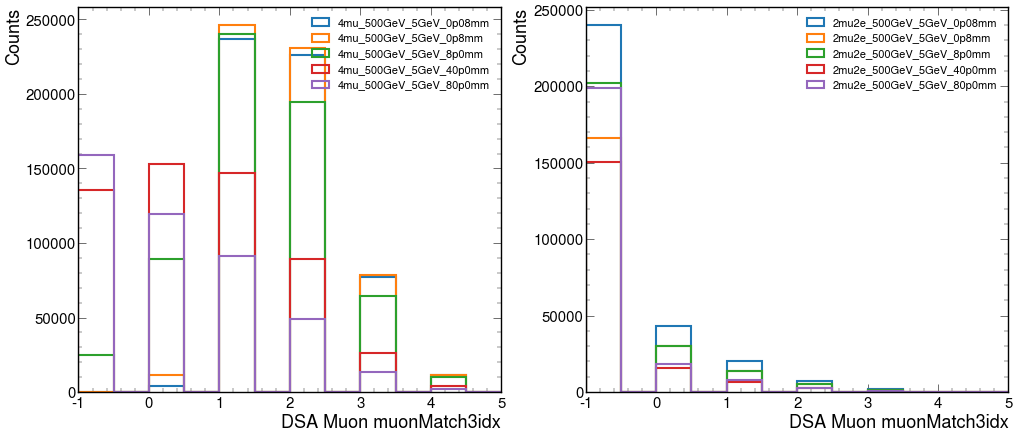

In [5]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonMatch3idx", events_4mu[i_4mu].muonMatch3idx, events_2mu2e[i_2mu].muonMatch3idx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonMatch3idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonMatch3idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,5)
ax[1].set_xlim(-1,5)
ax[0].set_xlabel('DSA Muon muonMatch3idx')
ax[1].set_xlabel('DSA Muon muonMatch3idx')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper right')
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonMatch3idx.png", bbox_inches="tight")

## muonMatch4

4mu muonMatch4 structure: [[0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, ... 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0]]
2mu2e muonMatch4 structure: [[-1, -1, -1, -1, -1], [-1, -1], [-1, -1, ... [-1, -1], [-1, -1], [-1, -1, -1]]
4mu muonMatch4 structure: [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, ... [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0]]
2mu2e muonMatch4 structure: [[-1], [-1, -1, -1, -1], [-1, -1, -1, -1, ... [-1, -1, -1, -1, -1, -1], [-1, -1]]
4mu muonMatch4 structure: [[0, 0, 0, 0, 0, 0, 0, 0, 0], [-1, -1, -1, ... [0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
2mu2e muonMatch4 structure: [[-1, -1], [-1, -1], [-1, -1], [-1], ... -1, -1, -1], [-1, -1], [-1, -1, -1, -1, -1]]
4mu muonMatch4 structure: [[0, 0, 0, 0], [0, 0, 0], [-1, -1, -1], ... -1], [0, 0, 0, 0, 0, 0, 0], [-1, -1, -1]]
2mu2e muonMatch4 structure: [[-1, -1, -1, -1, -1], [-1, -1, -1], [-1, ... -1, -1, -1, -1], [-1, -1], [-1, -1]]
4mu muonMatch4 structure: [[-1, -1, -1], [-1, -1, -1, -1, -1], [-1, ... [-1, -1, -1, -1, -1], [-1, -1, -1, -1]]
2mu2

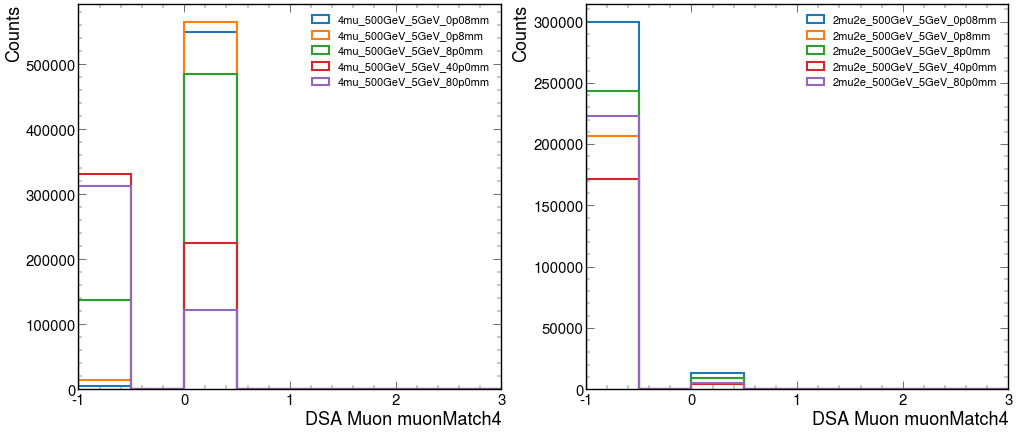

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonMatch4", events_4mu[i_4mu].muonMatch4, events_2mu2e[i_2mu].muonMatch4)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonMatch4), range=(-1,3), alpha=1, bins=8, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonMatch4), range=(-1,3), alpha=1, bins=8, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,3)
ax[1].set_xlim(-1,3)
ax[0].set_xlabel('DSA Muon muonMatch4')
ax[1].set_xlabel('DSA Muon muonMatch4')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper right')
ax[1].legend(fontsize=16)
ax[0].set_xticks([-1,0,1,2,3])
ax[1].set_xticks([-1,0,1,2,3])
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonMatch4.png", bbox_inches="tight")

## muonMatch4idx

4mu muonMatch4idx structure: [[1, 0, 0], [3, 1, 1, 2, 1, 1], [0, 0, 0, ... 0, 0], [0, 0, 1, 0, 0], [0, 1, 0, 0]]
2mu2e muonMatch4idx structure: [[-1, -1, -1, -1, -1], [-1, -1], [-1, -1, ... [-1, -1], [-1, -1], [-1, -1, -1]]
4mu muonMatch4idx structure: [[0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 1, ... [3, 2, 1, 1, 1, 1, 1, 1], [1, 0, 0]]
2mu2e muonMatch4idx structure: [[-1], [-1, -1, -1, -1], [-1, -1, -1, -1, ... [-1, -1, -1, -1, -1, -1], [-1, -1]]
4mu muonMatch4idx structure: [[3, 2, 1, 1, 1, 1, 1, 2, 1], [-1, -1, -1, ... [0, 1, 0, 0, 0], [1, 2, 2, 2, 1, 1]]
2mu2e muonMatch4idx structure: [[-1, -1], [-1, -1], [-1, -1], [-1], ... -1, -1, -1], [-1, -1], [-1, -1, -1, -1, -1]]
4mu muonMatch4idx structure: [[0, 0, 1, 0], [0, 1, 0], [-1, -1, -1], ... -1], [0, 0, 0, 0, 0, 0, 1], [-1, -1, -1]]
2mu2e muonMatch4idx structure: [[-1, -1, -1, -1, -1], [-1, -1, -1], [-1, ... -1, -1, -1, -1], [-1, -1], [-1, -1]]
4mu muonMatch4idx structure: [[-1, -1, -1], [-1, -1, -1, -1, -1], [-1, ... [-1, -1, -1, -1, 

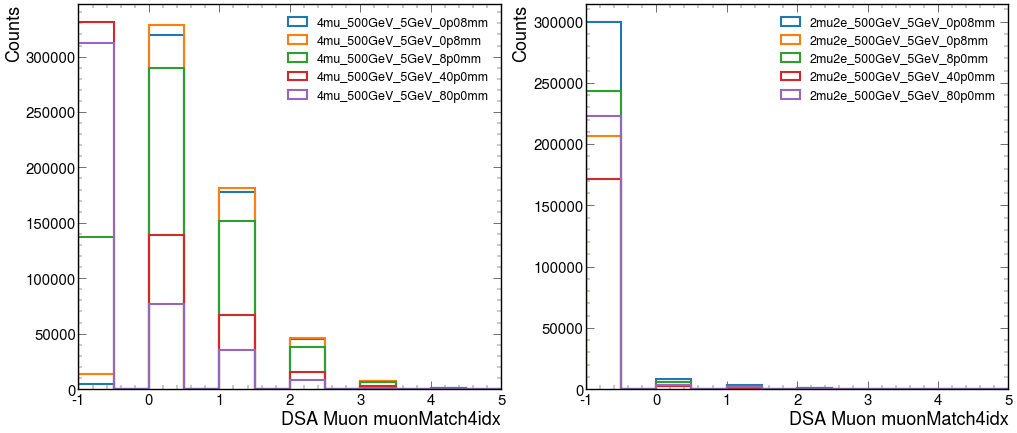

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonMatch4idx", events_4mu[i_4mu].muonMatch4idx, events_2mu2e[i_2mu].muonMatch4idx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonMatch4idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonMatch4idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,5)
ax[1].set_xlim(-1,5)
ax[0].set_xlabel('DSA Muon muonMatch4idx')
ax[1].set_xlabel('DSA Muon muonMatch4idx')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18, loc='upper right')
ax[1].legend(fontsize=18)
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonMatch4idx.png", bbox_inches="tight")

## muonMatch5

4mu muonMatch5 structure: [[-1, -1, -1], [0, 0, 0, 0, 0, 0], ... [-1, -1, -1, -1, -1], [-1, -1, -1, -1]]
2mu2e muonMatch5 structure: [[-1, -1, -1, -1, -1], [-1, -1], [-1, -1, ... [-1, -1], [-1, -1], [-1, -1, -1]]
4mu muonMatch5 structure: [[-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], ... 0, 0, 0, 0, 0, 0, 0], [-1, -1, -1]]
2mu2e muonMatch5 structure: [[-1], [-1, -1, -1, -1], [-1, -1, -1, -1, ... [-1, -1, -1, -1, -1, -1], [-1, -1]]
4mu muonMatch5 structure: [[0, 0, 0, 0, 0, 0, 0, 0, 0], [-1, -1, ... -1, -1, -1, -1, -1], [0, 0, 0, 0, 0, 0]]
2mu2e muonMatch5 structure: [[-1, -1], [-1, -1], [-1, -1], [-1], ... -1, -1, -1], [-1, -1], [-1, -1, -1, -1, -1]]
4mu muonMatch5 structure: [[-1, -1, -1, -1], [-1, -1, -1], [-1, ... -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1]]
2mu2e muonMatch5 structure: [[-1, -1, -1, -1, -1], [-1, -1, -1], [-1, ... -1, -1, -1, -1], [-1, -1], [-1, -1]]
4mu muonMatch5 structure: [[-1, -1, -1], [-1, -1, -1, -1, -1], [-1, ... [-1, -1, -1, -1, -1], [-1, -1, -1, -1]]
2mu2e mu

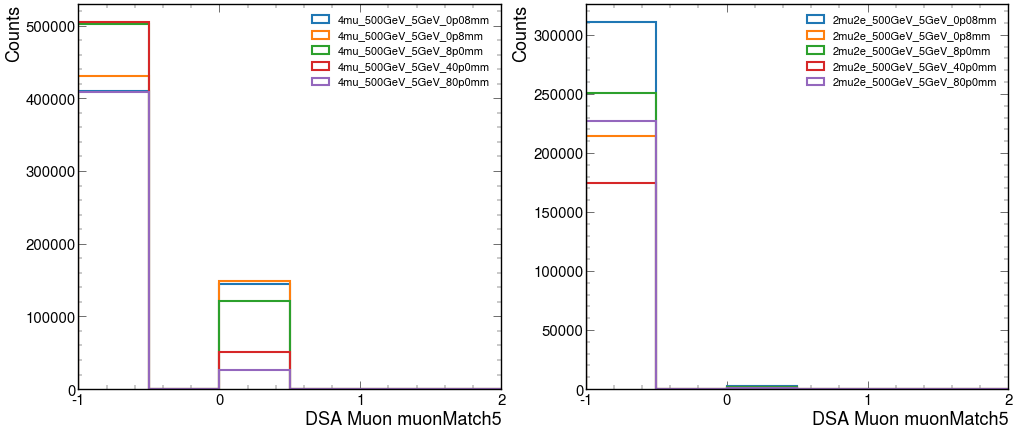

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonMatch5", events_4mu[i_4mu].muonMatch5, events_2mu2e[i_2mu].muonMatch5)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonMatch5), range=(-1,2), alpha=1, bins=6, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonMatch5), range=(-1,2), alpha=1, bins=6, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,2)
ax[1].set_xlim(-1,2)
ax[0].set_xlabel('DSA Muon muonMatch5')
ax[1].set_xlabel('DSA Muon muonMatch5')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper right')
ax[1].legend(fontsize=16)
ax[0].set_xticks([-1,0,1,2])
ax[1].set_xticks([-1,0,1,2])
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonMatch5.png", bbox_inches="tight")

## muonMatch5idx

4mu muonMatch5idx structure: [[-1, -1, -1], [0, 0, 0, 1, 0, 0], ... [-1, -1, -1, -1, -1], [-1, -1, -1, -1]]
2mu2e muonMatch5idx structure: [[-1, -1, -1, -1, -1], [-1, -1], [-1, -1, ... [-1, -1], [-1, -1], [-1, -1, -1]]
4mu muonMatch5idx structure: [[-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], ... 1, 0, 0, 0, 0, 0, 0], [-1, -1, -1]]
2mu2e muonMatch5idx structure: [[-1], [-1, -1, -1, -1], [-1, -1, -1, -1, ... [-1, -1, -1, -1, -1, -1], [-1, -1]]
4mu muonMatch5idx structure: [[1, 1, 0, 0, 0, 0, 0, 0, 0], [-1, -1, ... -1, -1, -1, -1, -1], [0, 1, 0, 0, 0, 0]]
2mu2e muonMatch5idx structure: [[-1, -1], [-1, -1], [-1, -1], [-1], ... -1, -1, -1], [-1, -1], [-1, -1, -1, -1, -1]]
4mu muonMatch5idx structure: [[-1, -1, -1, -1], [-1, -1, -1], [-1, ... -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1]]
2mu2e muonMatch5idx structure: [[-1, -1, -1, -1, -1], [-1, -1, -1], [-1, ... -1, -1, -1, -1], [-1, -1], [-1, -1]]
4mu muonMatch5idx structure: [[-1, -1, -1], [-1, -1, -1, -1, -1], [-1, ... [-1, -1, -1, -1, -1],

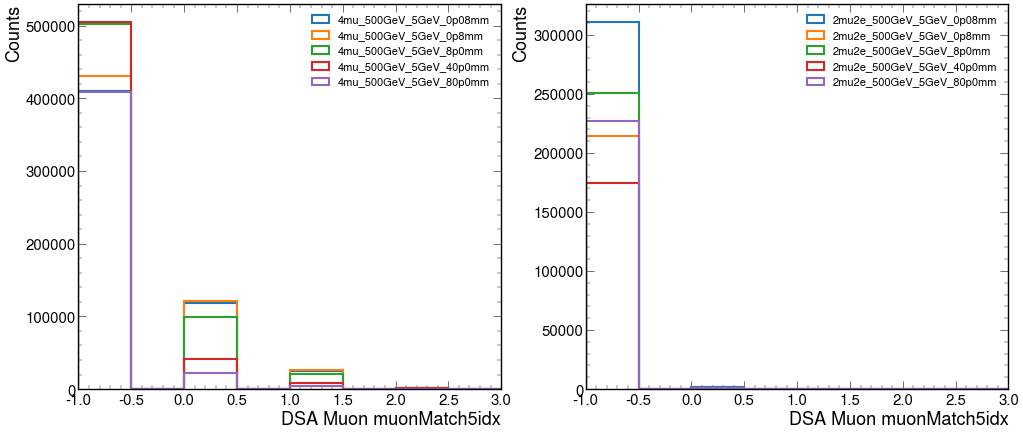

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonMatch5idx", events_4mu[i_4mu].muonMatch5idx, events_2mu2e[i_2mu].muonMatch5idx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonMatch5idx), range=(-1,3), alpha=1, bins=8, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonMatch5idx), range=(-1,3), alpha=1, bins=8, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,3)
ax[1].set_xlim(-1,3)
ax[0].set_xlabel('DSA Muon muonMatch5idx')
ax[1].set_xlabel('DSA Muon muonMatch5idx')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper right')
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonMatch5idx.png", bbox_inches="tight")

## muonDTMatch1

4mu muonDTMatch1 structure: [[2, 3, 2], [0, 0, 0, 0, 0, 1], [3, 0, 0, ... 4, 3], [4, 0, 0, 3, 0], [0, 4, 4, 3]]
2mu2e muonDTMatch1 structure: [[0, 0, 0, 0, 0], [4, 4], [0, 2, 0, 3], [0, ... [4, 3], [3, 3], [2, 1], [0, 0, 0]]
4mu muonDTMatch1 structure: [[0, 0, 0, 3, 3], [0, 4, 4, 2, 3], [0, 0, ... [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 2]]
2mu2e muonDTMatch1 structure: [[2], [0, 0, 0, 2], [4, 0, 0, 0, 4], [1, ... [0, 3, 3], [0, 0, 0, 2, 2, 0], [3, 3]]
4mu muonDTMatch1 structure: [[0, 0, 0, 0, 0, 0, 0, 3, 1], [4, 0, 4, 4, ... [0, 3, 0, 0, 3], [0, 0, 0, 0, 4, 4]]
2mu2e muonDTMatch1 structure: [[0, 3], [2, 2], [2, 4], [2], [2, 0, 4, ... 0], [4, 3, 0], [0, 0], [0, 0, 4, 3, 0]]
4mu muonDTMatch1 structure: [[0, 4, 2, 0], [1, 2, 3], [0, 4, 2], [0, ... [4], [0, 0, 0, 0, 0, 2, 2], [0, 0, 0]]
2mu2e muonDTMatch1 structure: [[0, 3, 0, 0, 3], [4, 0, 4], [0, 0, 0], ... [0, 0, 1, 0, 0, 0], [0, 0], [2, 0]]
4mu muonDTMatch1 structure: [[0, 1, 0], [-1, -1, -1, -1, -1], [0, 0, 0, ... 2, 0], [0, 0, 2, 2, 2], [0

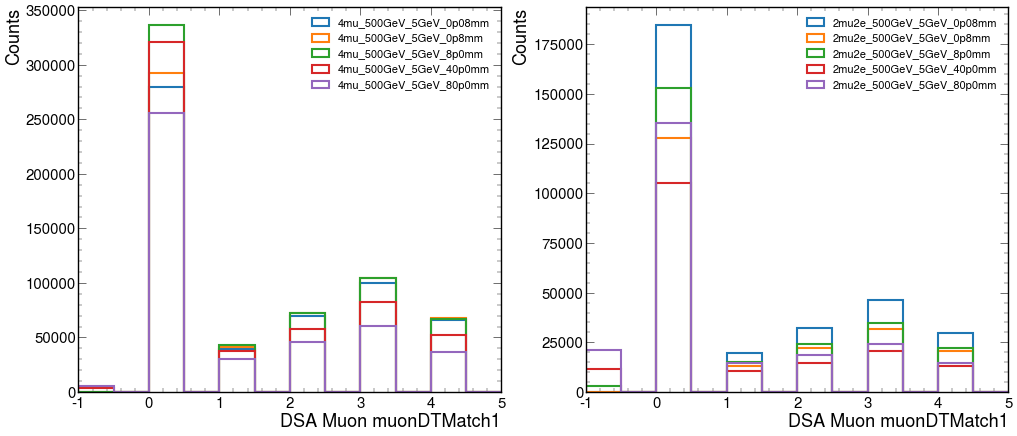

In [14]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonDTMatch1", events_4mu[i_4mu].muonDTMatch1, events_2mu2e[i_2mu].muonDTMatch1)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonDTMatch1), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonDTMatch1), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,5)
ax[1].set_xlim(-1,5)
ax[0].set_xlabel('DSA Muon muonDTMatch1')
ax[1].set_xlabel('DSA Muon muonDTMatch1')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper right')
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonDTMatch1.png", bbox_inches="tight")

## muonDTMatch1idx

4mu muonDTMatch1idx structure: [[0, 1, 3], [4, 4, 4, 4, 4, 3], [2, 3, 3, ... 1, 3], [2, 3, 3, 1, 3], [3, 0, 3, 1]]
2mu2e muonDTMatch1idx structure: [[1, 1, 1, 1, 1], [0, 1], [2, 0, 2, 1], [1, ... [0, 1], [0, 1], [0, 1], [1, 1, 1]]
4mu muonDTMatch1idx structure: [[3, 3, 3, 1, 2], [3, 3, 0, 1, 2], [3, 3, ... [4, 4, 4, 4, 4, 4, 4, 4], [0, 3, 2]]
2mu2e muonDTMatch1idx structure: [[1], [1, 1, 1, 1], [1, 1, 1, 1, 0], [0, ... [1, 1, 0], [2, 2, 2, 1, 0, 2], [1, 0]]
4mu muonDTMatch1idx structure: [[4, 4, 4, 4, 4, 4, 4, 1, 3], [1, 2, 0, 2, ... [3, 0, 3, 3, 3], [4, 4, 4, 4, 3, 2]]
2mu2e muonDTMatch1idx structure: [[1, 0], [1, 0], [0, 1], [1], [1, 4, 0, ... 1], [0, 1, 1], [1, 1], [1, 1, 1, 0, 1]]
4mu muonDTMatch1idx structure: [[3, 2, 0, 3], [3, 0, 1], [2, 0, 1], [2, ... [0], [3, 3, 3, 3, 3, 3, 0], [2, 2, 2]]
2mu2e muonDTMatch1idx structure: [[1, 0, 1, 1, 1], [0, 1, 1], [0, 0, 0], ... [0, 0, 0, 0, 0, 0], [1, 1], [0, 1]]
4mu muonDTMatch1idx structure: [[2, 0, 2], [-1, -1, -1, -1, -1], [2, 2, 2, ...

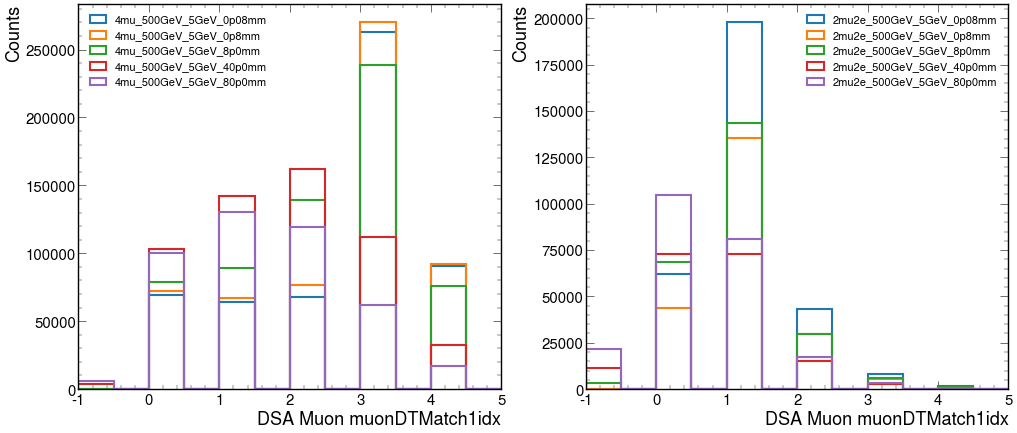

In [17]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonDTMatch1idx", events_4mu[i_4mu].muonDTMatch1idx, events_2mu2e[i_2mu].muonDTMatch1idx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonDTMatch1idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonDTMatch1idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,5)
ax[1].set_xlim(-1,5)
ax[0].set_xlabel('DSA Muon muonDTMatch1idx')
ax[1].set_xlabel('DSA Muon muonDTMatch1idx')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper left')
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonDTMatch1idx.png", bbox_inches="tight")

## muonDTMatch2

4mu muonDTMatch2 structure: [[1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, ... 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0]]
2mu2e muonDTMatch2 structure: [[0, 0, 0, 0, 0], [0, 0], [0, 0, 0, 0], [0, ... [0, 0], [0, 0], [0, 0], [0, 0, 0]]
4mu muonDTMatch2 structure: [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, ... [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 2]]
2mu2e muonDTMatch2 structure: [[0], [0, 0, 0, 0], [0, 0, 0, 0, 0], [0, ... [0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0]]
4mu muonDTMatch2 structure: [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, ... [0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
2mu2e muonDTMatch2 structure: [[0, 0], [0, 0], [0, 0], [2], [0, 0, 0, ... 0], [0, 0, 0], [0, 0], [0, 0, 0, 0, 0]]
4mu muonDTMatch2 structure: [[0, 0, 0, 0], [0, 0, 0], [0, 0, 0], [0, ... [-1], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0]]
2mu2e muonDTMatch2 structure: [[0, 0, 0, 0, 0], [0, 0, 0], [-1, -1, ... -1, -1, -1, -1, -1, -1], [0, 0], [0, 0]]
4mu muonDTMatch2 structure: [[0, 0, 0], [-1, -1, -1, -1, -1], [0, 0, 0, ... 2, 0], [0, 0, 0, 0, 0]

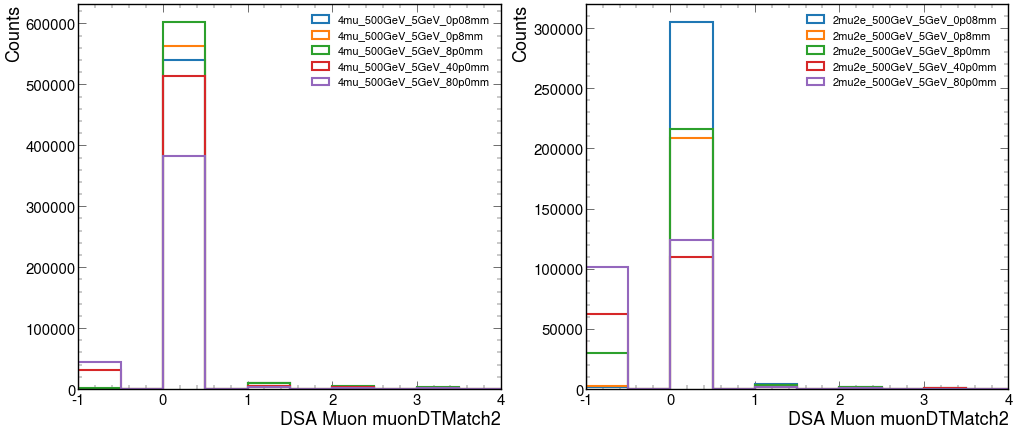

In [20]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonDTMatch2", events_4mu[i_4mu].muonDTMatch2, events_2mu2e[i_2mu].muonDTMatch2)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonDTMatch2), range=(-1,4), alpha=1, bins=10, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonDTMatch2), range=(-1,4), alpha=1, bins=10, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,4)
ax[1].set_xlim(-1,4)
ax[0].set_xlabel('DSA Muon muonDTMatch2')
ax[1].set_xlabel('DSA Muon muonDTMatch2')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper right')
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonDTMatch2.png", bbox_inches="tight")

## muonDTMatch2idx

4mu muonDTMatch2idx structure: [[2, 3, 2], [3, 3, 3, 3, 3, 4], [3, 2, 2, ... 3, 2], [3, 2, 2, 3, 2], [2, 3, 2, 3]]
2mu2e muonDTMatch2idx structure: [[0, 0, 0, 0, 0], [1, 0], [1, 2, 1, 2], [0, ... [1, 0], [1, 0], [1, 0], [0, 0, 0]]
4mu muonDTMatch2idx structure: [[2, 2, 2, 3, 3], [2, 2, 3, 3, 3], [2, 2, ... [3, 3, 3, 3, 3, 3, 3, 3], [3, 2, 1]]
2mu2e muonDTMatch2idx structure: [[0], [0, 0, 0, 0], [0, 0, 0, 0, 1], [1, ... [0, 0, 1], [1, 1, 1, 2, 2, 1], [0, 1]]
4mu muonDTMatch2idx structure: [[3, 3, 3, 3, 3, 3, 3, 4, 4], [2, 1, 2, 1, ... [2, 3, 2, 2, 2], [3, 3, 3, 3, 4, 4]]
2mu2e muonDTMatch2idx structure: [[0, 1], [0, 1], [1, 0], [0], [4, 3, 4, ... 0], [1, 0, 0], [0, 0], [0, 0, 0, 1, 0]]
4mu muonDTMatch2idx structure: [[2, 3, 3, 2], [2, 3, 3], [1, 2, 2], [1, ... [-1], [2, 2, 2, 2, 2, 2, 3], [1, 1, 1]]
2mu2e muonDTMatch2idx structure: [[0, 1, 0, 0, 0], [1, 0, 0], [-1, -1, ... -1, -1, -1, -1, -1, -1], [0, 0], [1, 0]]
4mu muonDTMatch2idx structure: [[1, 2, 1], [-1, -1, -1, -1, -1], [1, 1, 1,

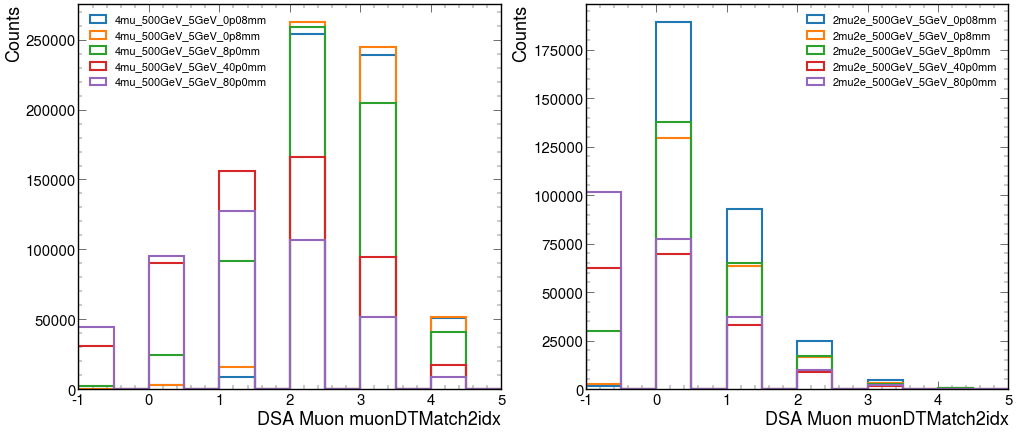

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonDTMatch2idx", events_4mu[i_4mu].muonDTMatch2idx, events_2mu2e[i_2mu].muonDTMatch2idx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonDTMatch2idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonDTMatch2idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,5)
ax[1].set_xlim(-1,5)
ax[0].set_xlabel('DSA Muon muonDTMatch2idx')
ax[1].set_xlabel('DSA Muon muonDTMatch2idx')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper left')
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonDTMatch2idx.png", bbox_inches="tight")

## muonDTMatch3

4mu muonDTMatch3 structure: [[0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, ... 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0]]
2mu2e muonDTMatch3 structure: [[-1, -1, -1, -1, -1], [-1, -1], [0, 0, 0, ... -1], [-1, -1], [-1, -1], [-1, -1, -1]]
4mu muonDTMatch3 structure: [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, ... [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0]]
2mu2e muonDTMatch3 structure: [[-1], [-1, -1, -1, -1], [-1, -1, -1, -1, -1, ... -1], [0, 0, 0, 0, 0, 0], [-1, -1]]
4mu muonDTMatch3 structure: [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, ... [0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
2mu2e muonDTMatch3 structure: [[-1, -1], [-1, -1], [-1, -1], [-1], ... -1, -1, -1], [-1, -1], [-1, -1, -1, -1, -1]]
4mu muonDTMatch3 structure: [[0, 0, 0, 0], [0, 0, 0], [0, 0, 0], [0, ... [-1], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0]]
2mu2e muonDTMatch3 structure: [[-1, -1, -1, -1, -1], [-1, -1, -1], [-1, ... -1, -1, -1, -1], [-1, -1], [-1, -1]]
4mu muonDTMatch3 structure: [[0, 0, 0], [-1, -1, -1, -1, -1], [0, 0, ... 0], [0, 0, 0, 0, 0]

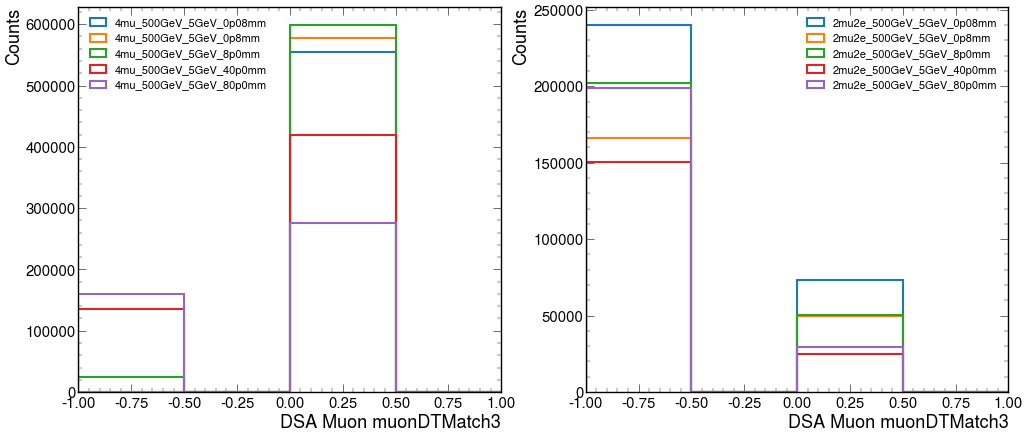

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonDTMatch3", events_4mu[i_4mu].muonDTMatch3, events_2mu2e[i_2mu].muonDTMatch3)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonDTMatch3), range=(-1,1), alpha=1, bins=4, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonDTMatch3), range=(-1,1), alpha=1, bins=4, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('DSA Muon muonDTMatch3')
ax[1].set_xlabel('DSA Muon muonDTMatch3')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper left')
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonDTMatch3.png", bbox_inches="tight")

## muonDTMatch3idx

4mu muonDTMatch3idx structure: [[3, 2, 1], [2, 2, 2, 2, 2, 2], [1, 1, 1, ... 2, 1], [1, 1, 1, 2, 1], [1, 2, 1, 2]]
2mu2e muonDTMatch3idx structure: [[-1, -1, -1, -1, -1], [-1, -1], [0, 1, 0, ... -1], [-1, -1], [-1, -1], [-1, -1, -1]]
4mu muonDTMatch3idx structure: [[1, 1, 1, 2, 1], [1, 1, 2, 2, 1], [1, 1, ... [2, 2, 2, 2, 2, 2, 2, 2], [2, 1, 3]]
2mu2e muonDTMatch3idx structure: [[-1], [-1, -1, -1, -1], [-1, -1, -1, -1, -1, ... -1], [0, 0, 0, 0, 1, 0], [-1, -1]]
4mu muonDTMatch3idx structure: [[2, 2, 2, 2, 2, 2, 2, 3, 2], [0, 0, 1, 0, ... [1, 2, 1, 1, 1], [2, 2, 2, 2, 2, 3]]
2mu2e muonDTMatch3idx structure: [[-1, -1], [-1, -1], [-1, -1], [-1], ... -1, -1, -1], [-1, -1], [-1, -1, -1, -1, -1]]
4mu muonDTMatch3idx structure: [[1, 1, 2, 1], [1, 2, 2], [0, 1, 0], [0, ... [-1], [1, 1, 1, 1, 1, 1, 2], [0, 0, 0]]
2mu2e muonDTMatch3idx structure: [[-1, -1, -1, -1, -1], [-1, -1, -1], [-1, ... -1, -1, -1, -1], [-1, -1], [-1, -1]]
4mu muonDTMatch3idx structure: [[0, 1, 0], [-1, -1, -1, -1, -1], [0,

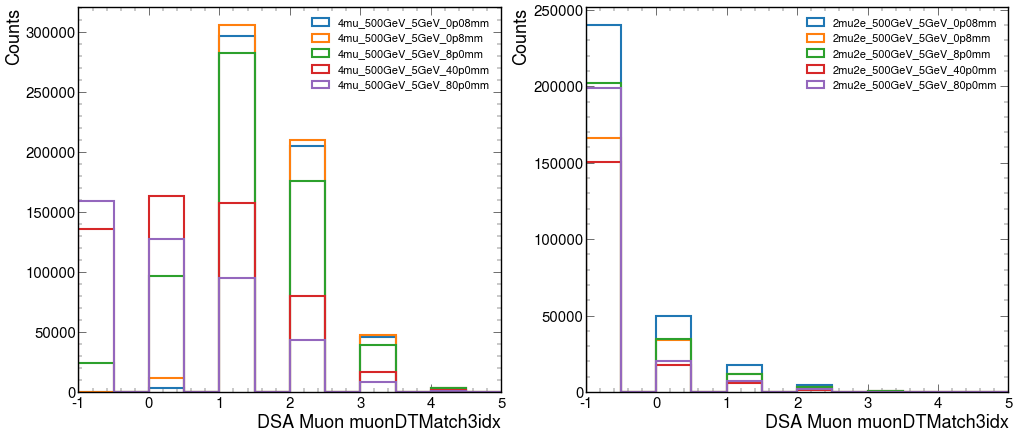

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonDTMatch3idx", events_4mu[i_4mu].muonDTMatch3idx, events_2mu2e[i_2mu].muonDTMatch3idx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonDTMatch3idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonDTMatch3idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,5)
ax[1].set_xlim(-1,5)
ax[0].set_xlabel('DSA Muon muonDTMatch3idx')
ax[1].set_xlabel('DSA Muon muonDTMatch3idx')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper right')
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonDTMatch3idx.png", bbox_inches="tight")

## muonCSCMatch1

4mu muonCSCMatch1 structure: [[0, 0, 0], [6, 5, 0, 7, 0, 0], [0, 0, 0, ... 0, 0], [0, 3, 4, 0, 0], [0, 0, 0, 0]]
2mu2e muonCSCMatch1 structure: [[4, 3, 0, 0, 0], [0, 0], [3, 1, 0, 0], [0, ... [0, 0], [0, 0], [1, 1], [4, 4, 0]]
4mu muonCSCMatch1 structure: [[0, 2, 3, 0, 0], [0, 0, 0, 0, 0], [0, 4, ... [4, 4, 2, 0, 0, 0, 0, 0], [0, 0, 0]]
2mu2e muonCSCMatch1 structure: [[0], [1, 0, 0, 0], [0, 0, 0, 0, 0], [3, ... [0, 0, 0], [0, 0, 3, 0, 0, 0], [0, 0]]
4mu muonCSCMatch1 structure: [[4, 4, 4, 0, 4, 4, 0, 0, 0], [0, 0, 0, 0, ... [4, 0, 0, 0, 0], [0, 4, 3, 3, 0, 0]]
2mu2e muonCSCMatch1 structure: [[0, 0], [1, 1], [0, 0], [0], [0, 0, 0, ... 3], [0, 0, 0], [2, 4], [0, 0, 0, 0, 0]]
4mu muonCSCMatch1 structure: [[2, 0, 0, 0], [0, 0, 0], [1, 0, 0], [0, ... [0], [0, 0, 4, 4, 0, 0, 0], [3, 3, 2]]
2mu2e muonCSCMatch1 structure: [[0, 0, 0, 0, 0], [0, 0, 0], [0, 0, 4], ... [0, 0, 0, 0, 0, 0], [4, 3], [0, 0]]
4mu muonCSCMatch1 structure: [[2, 0, 0], [-1, -1, -1, -1, -1], [0, 0, 0, ... 0, 0], [0, 0, 0, 

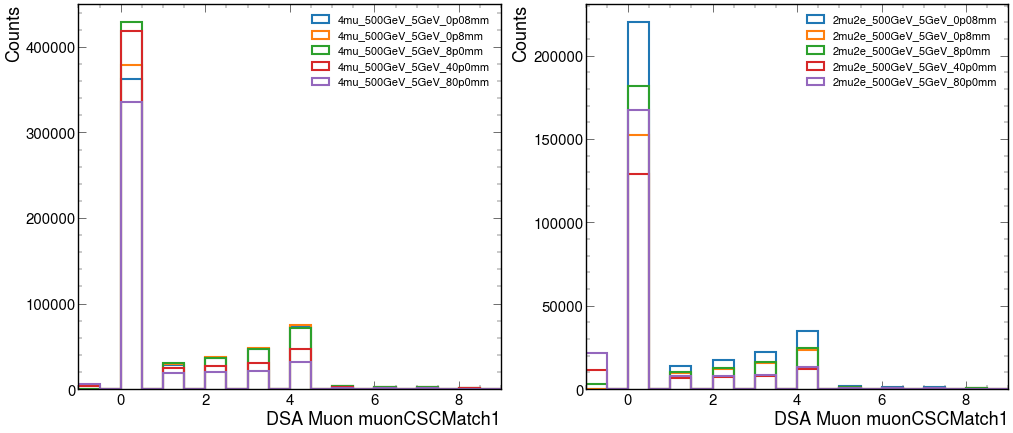

In [15]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonCSCMatch1", events_4mu[i_4mu].muonCSCMatch1, events_2mu2e[i_2mu].muonCSCMatch1)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonCSCMatch1), range=(-1,9), alpha=1, bins=20, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonCSCMatch1), range=(-1,9), alpha=1, bins=20, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,9)
ax[1].set_xlim(-1,9)
ax[0].set_xlabel('DSA Muon muonCSCMatch1')
ax[1].set_xlabel('DSA Muon muonCSCMatch1')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper right')
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonCSCMatch1.png", bbox_inches="tight")

## muonCSCMatch1idx

4mu muonCSCMatch1idx structure: [[3, 3, 3], [1, 4, 4, 0, 4, 4], [3, 3, 3, ... 3, 3], [3, 3, 0, 3, 3], [3, 3, 3, 3]]
2mu2e muonCSCMatch1idx structure: [[1, 0, 1, 1, 1], [1, 1], [2, 0, 2, 2], [1, ... [1, 1], [1, 1], [0, 1], [1, 0, 1]]
4mu muonCSCMatch1idx structure: [[3, 3, 0, 3, 3], [3, 3, 3, 3, 3], [3, 0, ... [2, 0, 3, 4, 4, 4, 4, 4], [3, 3, 3]]
2mu2e muonCSCMatch1idx structure: [[1], [0, 1, 1, 1], [1, 1, 1, 1, 1], [0, ... [1, 1, 1], [2, 2, 2, 2, 2, 2], [1, 1]]
4mu muonCSCMatch1idx structure: [[0, 0, 2, 4, 4, 2, 4, 4, 4], [2, 2, 2, 2, ... [2, 3, 3, 3, 3], [4, 4, 1, 1, 4, 4]]
2mu2e muonCSCMatch1idx structure: [[1, 1], [1, 0], [1, 1], [1], [4, 4, 4, ... 1], [1, 1, 1], [1, 1], [1, 1, 1, 1, 1]]
4mu muonCSCMatch1idx structure: [[3, 3, 3, 3], [3, 3, 3], [2, 2, 2], [2, ... [0], [3, 3, 2, 1, 3, 3, 3], [2, 0, 1]]
2mu2e muonCSCMatch1idx structure: [[1, 1, 1, 1, 1], [1, 1, 1], [0, 0, 0], ... [0, 0, 0, 0, 0, 0], [0, 1], [1, 1]]
4mu muonCSCMatch1idx structure: [[1, 2, 2], [-1, -1, -1, -1, -1], [2, 

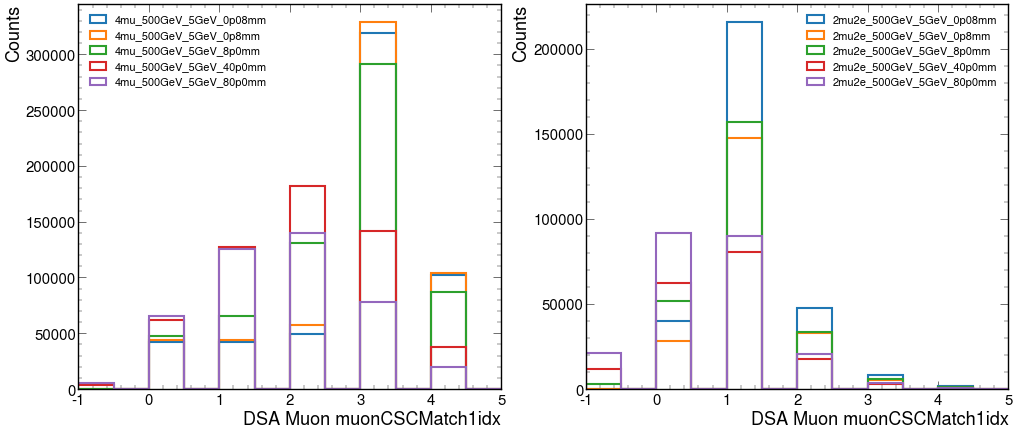

In [18]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonCSCMatch1idx", events_4mu[i_4mu].muonCSCMatch1idx, events_2mu2e[i_2mu].muonCSCMatch1idx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonCSCMatch1idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonCSCMatch1idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,5)
ax[1].set_xlim(-1,5)
ax[0].set_xlabel('DSA Muon muonCSCMatch1idx')
ax[1].set_xlabel('DSA Muon muonCSCMatch1idx')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper left')
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonCSCMatch1idx.png", bbox_inches="tight")

## muonCSCMatch2

4mu muonCSCMatch2 structure: [[0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, ... 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0]]
2mu2e muonCSCMatch2 structure: [[0, 0, 0, 0, 0], [0, 0], [0, 0, 0, 0], [0, ... [0, 0], [0, 0], [0, 0], [0, 0, 0]]
4mu muonCSCMatch2 structure: [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, ... [4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0]]
2mu2e muonCSCMatch2 structure: [[0], [0, 0, 0, 0], [0, 0, 0, 0, 0], [0, ... [0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0]]
4mu muonCSCMatch2 structure: [[2, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, ... [4, 0, 0, 0, 0], [0, 4, 0, 0, 0, 0]]
2mu2e muonCSCMatch2 structure: [[0, 0], [0, 0], [0, 0], [0], [0, 0, 0, ... 0], [0, 0, 0], [0, 0], [0, 0, 0, 0, 0]]
4mu muonCSCMatch2 structure: [[2, 0, 0, 0], [0, 0, 0], [0, 0, 0], [0, ... [-1], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0]]
2mu2e muonCSCMatch2 structure: [[0, 0, 0, 0, 0], [0, 0, 0], [-1, -1, ... -1, -1, -1, -1, -1, -1], [0, 0], [0, 0]]
4mu muonCSCMatch2 structure: [[0, 0, 0], [-1, -1, -1, -1, -1], [0, 0, 0, ... 0, 0], [0, 0,

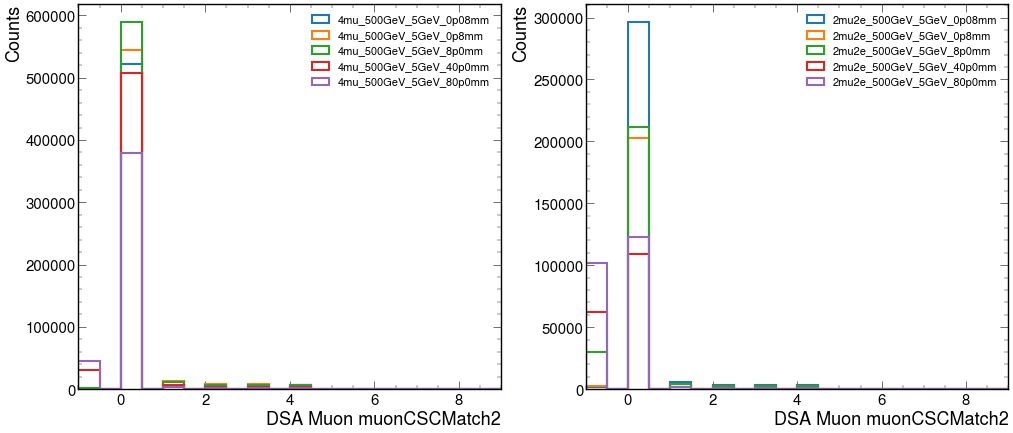

In [21]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonCSCMatch2", events_4mu[i_4mu].muonCSCMatch2, events_2mu2e[i_2mu].muonCSCMatch2)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonCSCMatch2), range=(-1,9), alpha=1, bins=20, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonCSCMatch2), range=(-1,9), alpha=1, bins=20, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,9)
ax[1].set_xlim(-1,9)
ax[0].set_xlabel('DSA Muon muonCSCMatch2')
ax[1].set_xlabel('DSA Muon muonCSCMatch2')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper right')
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonCSCMatch2.png", bbox_inches="tight")

## muonCSCMatch2idx

4mu muonCSCMatch2idx structure: [[2, 2, 2], [2, 3, 3, 4, 3, 3], [2, 2, 2, ... 2, 2], [2, 2, 3, 2, 2], [2, 2, 2, 2]]
2mu2e muonCSCMatch2idx structure: [[0, 1, 0, 0, 0], [0, 0], [1, 2, 1, 1], [0, ... [0, 0], [0, 0], [1, 0], [0, 1, 0]]
4mu muonCSCMatch2idx structure: [[2, 2, 3, 2, 2], [2, 2, 2, 2, 2], [2, 3, ... [1, 4, 4, 3, 3, 3, 3, 3], [2, 2, 2]]
2mu2e muonCSCMatch2idx structure: [[0], [1, 0, 0, 0], [0, 0, 0, 0, 0], [1, ... [0, 0, 0], [1, 1, 1, 1, 1, 1], [0, 0]]
4mu muonCSCMatch2idx structure: [[2, 4, 4, 3, 3, 4, 3, 3, 3], [1, 1, 1, 1, ... [1, 2, 2, 2, 2], [3, 0, 4, 4, 3, 3]]
2mu2e muonCSCMatch2idx structure: [[0, 0], [0, 1], [0, 0], [0], [3, 3, 3, ... 0], [0, 0, 0], [0, 0], [0, 0, 0, 0, 0]]
4mu muonCSCMatch2idx structure: [[1, 2, 2, 2], [2, 2, 2], [1, 1, 1], [1, ... [-1], [2, 2, 3, 3, 2, 2, 2], [1, 2, 2]]
2mu2e muonCSCMatch2idx structure: [[0, 0, 0, 0, 0], [0, 0, 0], [-1, -1, ... -1, -1, -1, -1, -1, -1], [1, 0], [0, 0]]
4mu muonCSCMatch2idx structure: [[2, 1, 1], [-1, -1, -1, -1, -1], 

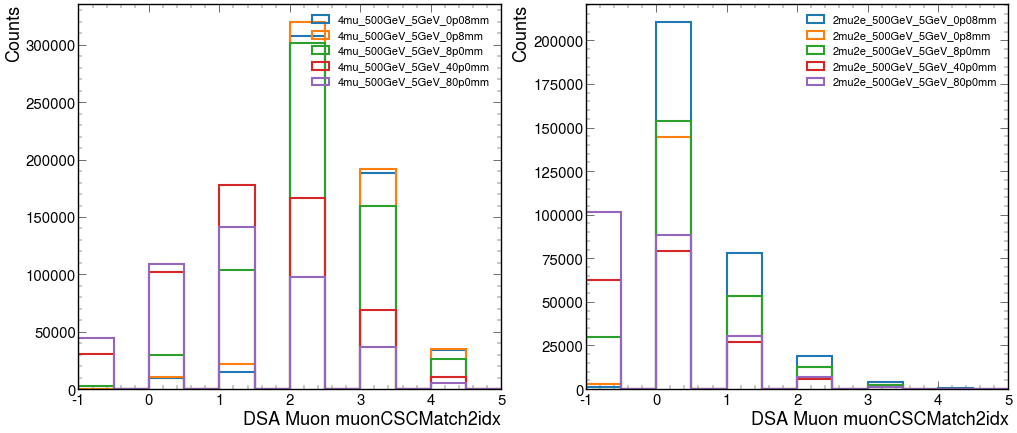

In [23]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonCSCMatch2idx", events_4mu[i_4mu].muonCSCMatch2idx, events_2mu2e[i_2mu].muonCSCMatch2idx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonCSCMatch2idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonCSCMatch2idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,5)
ax[1].set_xlim(-1,5)
ax[0].set_xlabel('DSA Muon muonCSCMatch2idx')
ax[1].set_xlabel('DSA Muon muonCSCMatch2idx')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper right')
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonCSCMatch2idx.png", bbox_inches="tight")

## muonCSCMatch3

4mu muonCSCMatch3 structure: [[0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, ... 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0]]
2mu2e muonCSCMatch3 structure: [[-1, -1, -1, -1, -1], [-1, -1], [0, 0, 0, ... -1], [-1, -1], [-1, -1], [-1, -1, -1]]
4mu muonCSCMatch3 structure: [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, ... [2, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0]]
2mu2e muonCSCMatch3 structure: [[-1], [-1, -1, -1, -1], [-1, -1, -1, -1, -1, ... -1], [0, 0, 0, 0, 0, 0], [-1, -1]]
4mu muonCSCMatch3 structure: [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, ... [0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
2mu2e muonCSCMatch3 structure: [[-1, -1], [-1, -1], [-1, -1], [-1], ... -1, -1, -1], [-1, -1], [-1, -1, -1, -1, -1]]
4mu muonCSCMatch3 structure: [[0, 0, 0, 0], [0, 0, 0], [0, 0, 0], [0, ... [-1], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0]]
2mu2e muonCSCMatch3 structure: [[-1, -1, -1, -1, -1], [-1, -1, -1], [-1, ... -1, -1, -1, -1], [-1, -1], [-1, -1]]
4mu muonCSCMatch3 structure: [[0, 0, 0], [-1, -1, -1, -1, -1], [0, 0, ... 0], [0, 0,

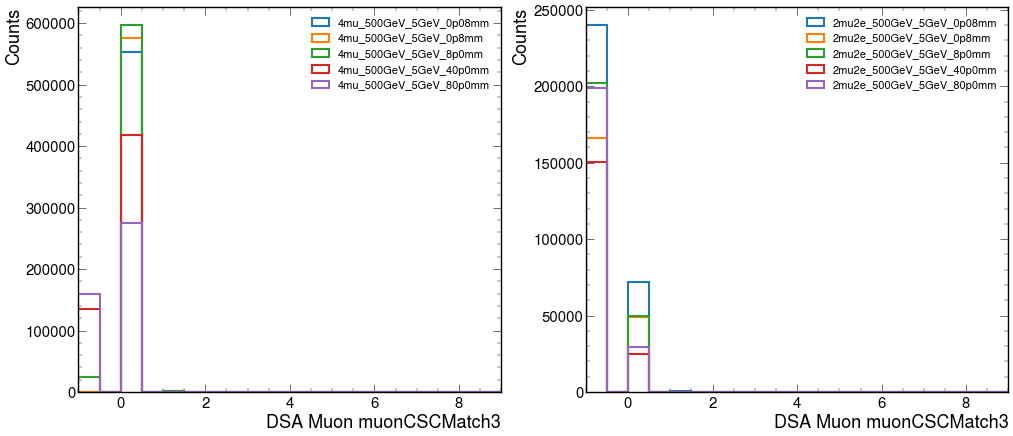

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonCSCMatch3", events_4mu[i_4mu].muonCSCMatch3, events_2mu2e[i_2mu].muonCSCMatch3)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonCSCMatch3), range=(-1,9), alpha=1, bins=20, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonCSCMatch3), range=(-1,9), alpha=1, bins=20, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,9)
ax[1].set_xlim(-1,9)
ax[0].set_xlabel('DSA Muon muonCSCMatch3')
ax[1].set_xlabel('DSA Muon muonCSCMatch3')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper right')
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonCSCMatch3.png", bbox_inches="tight")

## muonCSCMatch3idx

4mu muonCSCMatch3idx structure: [[1, 1, 1], [4, 2, 2, 3, 2, 2], [1, 1, 1, ... 1, 1], [1, 1, 2, 1, 1], [1, 1, 1, 1]]
2mu2e muonCSCMatch3idx structure: [[-1, -1, -1, -1, -1], [-1, -1], [0, 1, 0, ... -1], [-1, -1], [-1, -1], [-1, -1, -1]]
4mu muonCSCMatch3idx structure: [[1, 1, 2, 1, 1], [1, 1, 1, 1, 1], [1, 2, ... [4, 3, 2, 2, 2, 2, 2, 2], [1, 1, 1]]
2mu2e muonCSCMatch3idx structure: [[-1], [-1, -1, -1, -1], [-1, -1, -1, -1, -1, ... -1], [0, 0, 0, 0, 0, 0], [-1, -1]]
4mu muonCSCMatch3idx structure: [[4, 3, 3, 2, 2, 3, 2, 2, 2], [0, 0, 0, 0, ... [3, 1, 1, 1, 1], [2, 3, 3, 3, 2, 2]]
2mu2e muonCSCMatch3idx structure: [[-1, -1], [-1, -1], [-1, -1], [-1], ... -1, -1, -1], [-1, -1], [-1, -1, -1, -1, -1]]
4mu muonCSCMatch3idx structure: [[2, 1, 1, 1], [1, 1, 1], [0, 0, 0], [0, ... [-1], [1, 1, 1, 2, 1, 1, 1], [0, 1, 0]]
2mu2e muonCSCMatch3idx structure: [[-1, -1, -1, -1, -1], [-1, -1, -1], [-1, ... -1, -1, -1, -1], [-1, -1], [-1, -1]]
4mu muonCSCMatch3idx structure: [[0, 0, 0], [-1, -1, -1, -1,

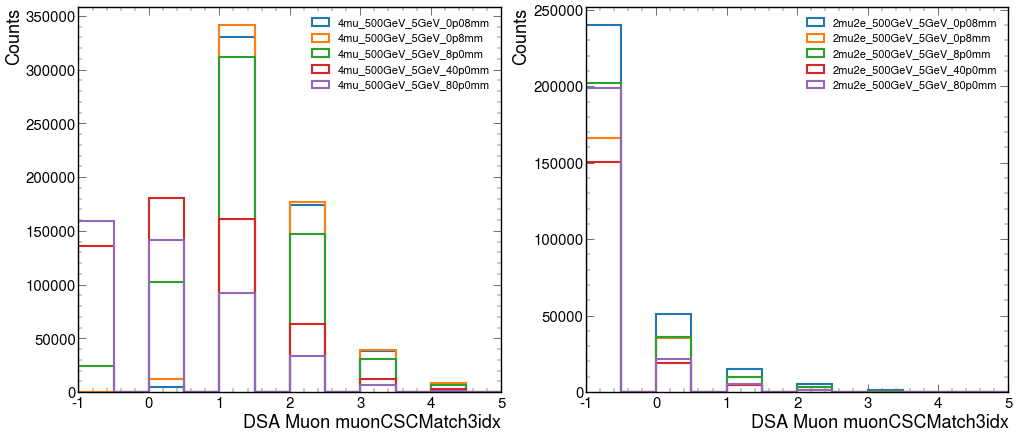

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("muonCSCMatch3idx", events_4mu[i_4mu].muonCSCMatch3idx, events_2mu2e[i_2mu].muonCSCMatch3idx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].muonCSCMatch3idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].muonCSCMatch3idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,5)
ax[1].set_xlim(-1,5)
ax[0].set_xlabel('DSA Muon muonCSCMatch3idx')
ax[1].set_xlabel('DSA Muon muonCSCMatch3idx')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper right')
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Info_for_DSA_matching/muonCSCMatch3idx.png", bbox_inches="tight")